In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [18]:
class BatsmanState(TypedDict):

    runs:int
    balls:int
    fours:int
    sixes:int 

    sr: float
    bpb:float
    boundry_percent:float
    summary:str
    

In [26]:
def calculate_sr(state:BatsmanState):

    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

In [27]:
def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours']+state['sixes'])
    return {'bpb':bpb}

In [28]:
def calculate_boundry_percent(state: BatsmanState):

    boundry_percent = (((state['fours']*4 + state['sixes']*6))/state['runs'])*100
    return {'boundry_percent':boundry_percent}

In [29]:
def summary(state: BatsmanState):
    summary = f"""
    Strike rate- {state['sr']}\n
    Balls per boundry- {state['bpb']}\n
    Boundry percent- {state['boundry_percent']}\n
    """
    return {'summary':summary}

In [30]:
graph= StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundry_percent', calculate_boundry_percent)
graph.add_node('summary', summary)

# Edges 
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundry_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundry_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

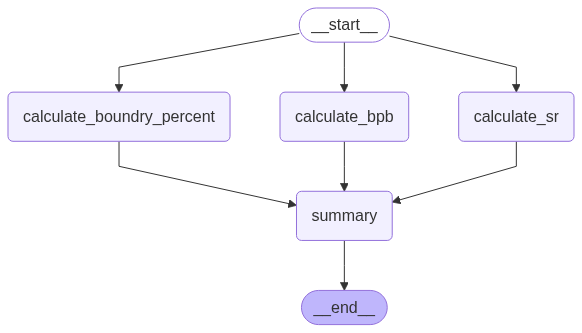

In [31]:
workflow

In [32]:
initial_state: BatsmanState = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4,
    'sr': 0.0,
    'bpb':0.0,
    'boundry_percent':0.0,
    'summary':""
}

In [33]:
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundry_percent': 48.0, 'summary': '\n    Strike rate- 200.0\n\n    Balls per boundry- 5.0\n\n    Boundry percent- 48.0\n\n    '}
